sigma^2 = lambda * sigma(prev)^2 + (1-lambda)return^2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import data_reader as dr

In [2]:
data= dr.read()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2484 non-null   object 
 1   Daily_trading_range  2478 non-null   float64
 2   Log_Volume_change    2471 non-null   float64
 3   Daily_return         2483 non-null   float64
 4   Daily_log_return     2471 non-null   float64
 5   Index                2478 non-null   float64
 6   Past_vol22           2342 non-null   float64
 7   gold                 2462 non-null   float64
 8   oil                  2463 non-null   float64
 9   Target22             2342 non-null   float64
 10  Target10             2414 non-null   float64
dtypes: float64(10), object(1)
memory usage: 213.6+ KB


In [6]:
data = data.drop(['Daily_return'], axis=1)
data['Squared_return'] = data['Daily_log_return']**2
data.head(30)

KeyError: "['Daily_return'] not found in axis"

In [7]:
data_cleaned = data[22:]
data_cleaned = data_cleaned.dropna()
data_cleaned.head(100)

,Date,Daily_trading_range,Log_Volume_change,Daily_log_return,Index,Past_vol22,gold,oil,Target22,Target10,Squared_return
22,2011-01-03,15.260010,14.632111,0.009260,2070.080078,0.125370,1422.599976,91.550003,0.103003,0.085430,0.000086
23,2011-01-04,16.019776,16.086549,0.007249,2085.139893,0.123058,1378.500000,89.379997,0.099205,0.092312,0.000053
24,2011-01-05,10.219971,-7.434844,-0.001243,2082.550049,0.123330,1373.400024,90.300003,0.098520,0.081500,0.000002
25,2011-01-06,30.549804,5.468045,-0.002375,2077.610107,0.123273,1371.400024,88.379997,0.098654,0.082421,0.000006
26,2011-01-07,17.540039,-19.485688,0.004126,2086.199951,0.123324,1368.500000,88.029999,0.098439,0.085250,0.000017
...,...,...,...,...,...,...,...,...,...,...,...
117,2011-05-24,22.089844,-8.732170,0.002939,2061.760010,0.212641,1492.199951,98.440002,0.193467,0.238756,0.000009
118,2011-05-25,51.440063,25.069350,-0.012637,2035.869995,0.212595,1508.800049,99.489998,0.193091,0.238580,0.000160
119,2011-05-26,37.860108,-15.082289,0.027154,2091.909912,0.233691,1515.300049,97.699997,0.214781,0.256496,0.000737
120,2011-05-27,26.120117,-8.398260,0.003974,2100.239990,0.234500,1523.199951,99.589996,0.213322,0.257277,0.000016


In [8]:
sqreturn = np.array(data_cleaned['Daily_log_return']**2)
target = np.array(data_cleaned[['Target22']])
target = pd.DataFrame(target)


In [9]:
trainSize = int(len(sqreturn)*0.8)
testSize = len(sqreturn) - trainSize
# Training session

trainX = sqreturn[:trainSize]
trainY = target[:trainSize]

testX = sqreturn[trainSize:]
testY = target[trainSize:]


In [10]:
pred_vol = []
lamb=0.94
pred_vol.append(data_cleaned['Past_vol22'].iloc[0] / np.sqrt(252))

for i in range(trainSize-1):
    pred = lamb*(pred_vol[-1]**2) + (1-lamb)*sqreturn[i]
    pred_vol.append(np.sqrt(pred))

prev_vol = pred_vol[-1]
pred_vol = pd.DataFrame(pred_vol)
pred_vol = pred_vol * np.sqrt(252)
pred_vol

,0
0,0.125370
1,0.126772
2,0.126100
3,0.122354
4,0.118986
...,...
1851,0.175042
1852,0.170151
1853,0.172798
1854,0.167536


In [11]:
trainY

,0
0,0.103003
1,0.099205
2,0.098520
3,0.098654
4,0.098439
...,...
1851,0.141680
1852,0.147425
1853,0.141096
1854,0.140108


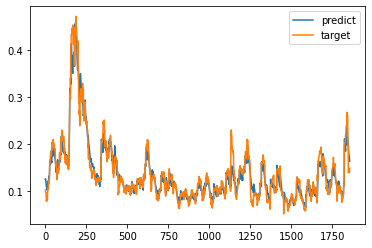

In [12]:
plt.plot(pred_vol.iloc[:], label='predict')
plt.plot(trainY.iloc[:], label='target')
plt.legend()
plt.show()

In [13]:
import metrics as mt

In [14]:
mt.testScore(pred_vol.iloc[1:], trainY.iloc[1:])

test Score: 0.0002923260142149534 MSE
test Score: 0.017097544098932847 RMSE
test Score: 0.08806766721997421 MAPE
test Score: 0.9352043967775703 R2 score


In [33]:
# test
lamb=0.93
test_pred = []
test_pred.append(prev_vol)
for i in range(trainSize, len(sqreturn)):
    test_vol = lamb*(test_pred[-1]**2) + (1-lamb)*sqreturn[i]
    test_pred.append(np.sqrt(test_vol))

test_pred = pd.DataFrame(test_pred)
test_pred = np.sqrt(252)*test_pred
test_target = np.array(target.iloc[len(sqreturn)-testSize:])
test_target = pd.DataFrame(test_target)

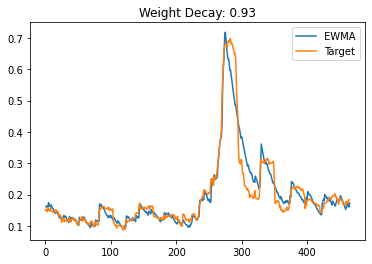

In [34]:
plt.plot(test_pred[1:], label='EWMA')
plt.plot(test_target, label='Target')
plt.title('Weight Decay: 0.93')
plt.legend()
# plt.savefig('images/EWMA.png')
plt.show()

In [35]:
mt.testScore(test_pred[1:], test_target)

test Score: 0.00112744263620551 MSE
test Score: 0.03357741258949995 RMSE
test Score: 0.09457444738524273 MAPE
test Score: 0.9231807701855381 R2 score
